# Maine Blackout Data Analysis

In [58]:
# importing required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# set options
pd.set_option('display.max_rows', 150)
pd.options.mode.chained_assignment = None

### Import and clean data

In [59]:
# importing data
df = pd.read_csv('../data/Maine_Power.csv')

# drop all entries with an unknown county or no customer hours tracked
df.drop(df[df['CountyName'] == "Unknown"].index, inplace=True)
df.drop(df[df['CustomerHoursTrackedTotal']  <= 0].index, inplace=True)

### Table of the yearly average outage hours per customer by county

In [60]:
# sum up all the customers tracked and total customer hours by month and county
county_monthly_df = df.groupby(['CountyName', 'RecordYear', 'RecordMonth']).agg({'CustomerHoursOutTotal': 'sum', 'AvgCustomersTracked': 'sum'}).reset_index()

# sum up total customer hours out by year and county and average the customers tracked (to avoid double counting)
yearly_df = county_monthly_df.groupby(['CountyName', 'RecordYear']).agg({'CustomerHoursOutTotal': 'sum', 'AvgCustomersTracked': 'mean'}).reset_index()

# get the yearly outage hours per customer for each county
yearly_df['OutageHoursPerCustomer'] = yearly_df['CustomerHoursOutTotal'] / yearly_df['AvgCustomersTracked']

# create a final table with the relevant columns
df_yearly_cust_outage = yearly_df[['CountyName', 'RecordYear', 'OutageHoursPerCustomer']]

# sort by county and year
df_yearly_cust_outage.sort_values(by=['CountyName', 'RecordYear'], inplace=True)

# rename columns to be more readable
df_yearly_cust_outage.rename(columns={"CountyName": "County", "RecordYear": "Year", "OutageHoursPerCustomer": "Average Outage Hours per Customer"}, inplace=True)

# export and show dataframe
df_yearly_cust_outage.to_csv("exports/maine-county-yearly-out-hours-per-cust.csv", sep=',', encoding='utf-8', index=False, header=True)
df_yearly_cust_outage

,County,Year,Average Outage Hours per Customer
0,Androscoggin,2016,1.220995
1,Androscoggin,2017,3.093134
2,Androscoggin,2018,6.942541
3,Androscoggin,2019,5.398300
4,Androscoggin,2020,33.409456
5,Androscoggin,2021,2.992960
6,Androscoggin,2022,19.751388
7,Androscoggin,2023,4.527381
8,Aroostook,2017,121.646927
9,Aroostook,2018,39.249731


### Create a choropleth map of average outage hours per customer by county

In [61]:
# Aroostok county only has data from 2017 onwards, removing data from 2016 and earlier for consistency
yearly_df.drop(yearly_df[yearly_df['RecordYear'] <= 2016].index, inplace=True)

# get the overall yearly average outage hours per customer by county
overall_county_outage_df = yearly_df.groupby(['CountyName']).agg({'OutageHoursPerCustomer': 'mean'}).reset_index()

# sort county names alphabetically
overall_county_outage_df.sort_values(by=['CountyName'], inplace=True)

#rename columns to be more readable
overall_county_outage_df.rename(columns={"CountyName": "County", "OutageHoursPerCustomer": "Overall Yearly Average Outage Hours per Customer (2017 - 2023)"}, inplace=True)

# export and show dataframe
overall_county_outage_df.to_csv("exports/maine-county-overall-out-hours-per-cust.csv", sep=',', encoding='utf-8', index=False, header=True)
overall_county_outage_df

,County,Overall Yearly Average Outage Hours per Customer (2017 - 2023)
0,Androscoggin,10.873594
1,Aroostook,28.526452
2,Cumberland,10.989717
3,Franklin,22.521771
4,Hancock,30.257909
5,Kennebec,11.959500
6,Knox,15.763804
7,Lincoln,26.078134
8,Oxford,22.389949
9,Penobscot,20.056071


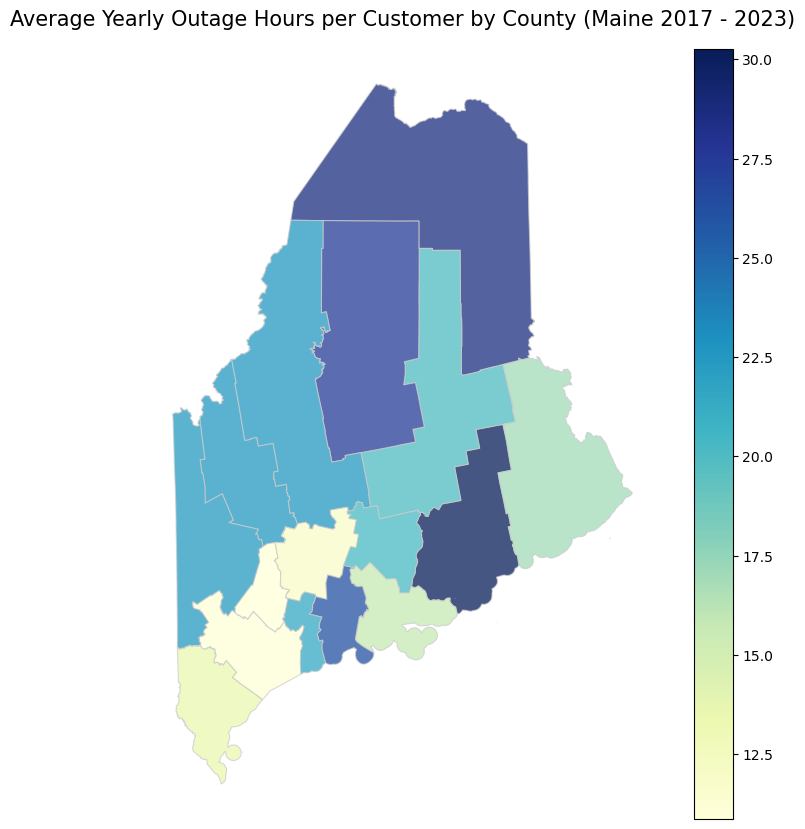

In [62]:
# import county boundaries
counties = gpd.read_file('../data/Maine_County_Boundary_Polygons_Dissolved_Feature.shp')

# merge county outage hours per customer data with geospatial data
merged = counties.set_index('COUNTY').join(overall_county_outage_df.set_index('County'))

# plot the choropleth map using the outage hours per customer as a variable
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(column='Overall Yearly Average Outage Hours per Customer (2017 - 2023)', alpha=0.75, cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# add county name labels
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index):
    ax.text(x, y, label, fontsize=8, ha='center', va='top')

# axis customization
ax.set_title('Average Yearly Outage Hours per Customer by County (Maine 2017 - 2023)', fontdict={'fontsize': '15', 'fontweight' : '3'}, loc='center')
ax.axis('off')

# save the map and display it within the notebook
plt.savefig('exports/maine-county-map-overall-out-hours-per-cust.png', dpi=300)
plt.show()

### Calculate average outage hours per customer by utility provider

In [63]:
# sum up all the customers tracked and total customer hours by month and utility provider
monthly_utility_df = df.groupby(['UtilityName', 'RecordYear', 'RecordMonth']).agg({'CustomerHoursOutTotal': 'sum', 'AvgCustomersTracked': 'sum'}).reset_index()

# sum up total customer hours out by year and utility provider and average the customers tracked (to avoid double counting)
yearly_utility_df = monthly_utility_df.groupby(['UtilityName', 'RecordYear']).agg({'CustomerHoursOutTotal': 'sum', 'AvgCustomersTracked': 'mean'}).reset_index()

# get the yearly outage hours per customer for each utility provider
yearly_utility_df['OutageHoursPerCustomer'] = yearly_utility_df['CustomerHoursOutTotal'] / yearly_utility_df['AvgCustomersTracked']

# Eastern Maine Power Cooperative only has data from 2018 onwards, removing data from 2017 and earlier for consistency
yearly_utility_df.drop(yearly_utility_df[yearly_utility_df['RecordYear'] <= 2017].index, inplace=True)

# get the overall yearly average outage hours per customer by utility provider
utility_cust_outage_df = yearly_utility_df.groupby(['UtilityName']).agg({'OutageHoursPerCustomer': 'mean'}).reset_index()

# sort utility names alphabetically
utility_cust_outage_df.sort_values(by=['UtilityName'], inplace=True)

# rename columns to be more readable
utility_cust_outage_df.rename(columns={"UtilityName": "Utility Provider", "OutageHoursPerCustomer": "Overall Yearly Average Outage Hours per Customer (2018 - 2023)"}, inplace=True)

# export and show dataframe
utility_cust_outage_df.to_csv("exports/maine-utility-overall-out-hours-per-cust.csv", sep=',', encoding='utf-8', index=False, header=True)
utility_cust_outage_df

,Utility Provider,Overall Yearly Average Outage Hours per Customer (2018 - 2023)
0,Central Maine Power,17.046712
1,Eastern Maine Power Cooperative,12.042109
2,Versant Power,18.860980
